IMPORT

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import joblib

DATASET (contains passenger details and survival status)


In [67]:
import pandas as pd

# Use the full path of your CSV
df = pd.read_csv(r"C:\Users\tejas\Downloads\archive\train.csv")  # notice the r"" to avoid errors
print(df.shape)
df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [68]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

FEATURE ENGINEERING

1.Extract TITLE from Name

In [69]:
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

2. FAMILY SIZE

In [70]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

3. CABIN PRESENCE


In [71]:
df['CabinPresent'] = df['Cabin'].notnull().astype(int)

DROP USELESS COLUMNS

In [72]:
df.drop(['PassengerId','Name','Ticket','Cabin'], axis=1, inplace=True)

HANDLE MISSING VALUES

1. AGE &  FARE 

In [73]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

2. EMBARKED

In [74]:
df['Embarked'] = df['Embarked'].fillna('S')

ENCODING


In [75]:
df = pd.get_dummies(df, drop_first=True)

SPLIT DATA

In [76]:
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

MODEL TRAINING


1. LOGISTIC REGRERSSION

In [77]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

2. RANDOM FOREST 

In [78]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

EVALUATION 

In [79]:
print("Logistic Accuracy:", accuracy_score(y_test, lr_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

Logistic Accuracy: 0.8212290502793296
Random Forest Accuracy: 0.8379888268156425


In [80]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       105
           1       0.81      0.80      0.80        74

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



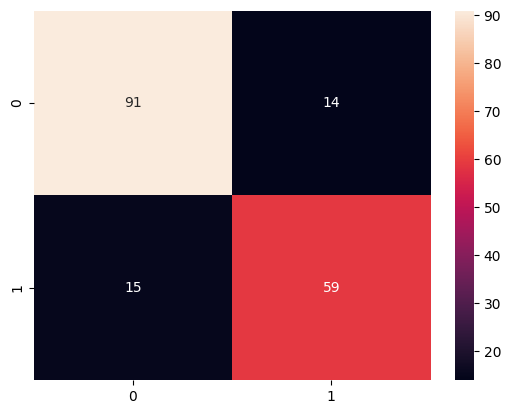

In [81]:
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d')
plt.show()

FEATURE IMPORTANCE (MODEL EXPLAINBLITY)

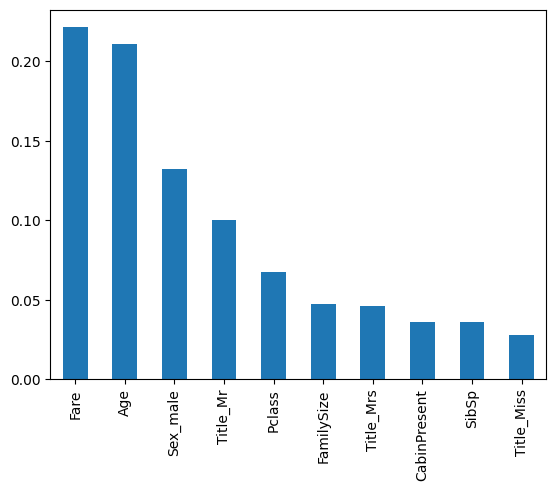

In [82]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(10).plot(kind='bar')
plt.show()

SAVE MODEL

In [83]:
joblib.dump(rf, "models/titanic_model.pkl")

['models/titanic_model.pkl']

INFERENCE EXAMPLE

In [84]:
model = joblib.load("models/titanic_model.pkl")

sample = X_test.iloc[:1]
prediction = model.predict(sample)

print("Survived" if prediction[0] == 1 else "Not Survived")

Survived
